In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


# CSN gender BOX

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_box.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_box.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_box.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_box.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_box.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_box.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-box'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [4]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-30 23:48:31,331 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-30 23:48:31,332 - mmaction - INFO - Use load_from_http loader
2021-08-30 23:48:33,419 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-30 23:48:33,420 - mmaction - INFO - Use load_from_local loader
2021-08-30 23:48:33,580 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-30 23:48:33,587 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.5 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:50:23,008 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:50:23,011 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-30 23:50:23,011 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:50:23,013 - mmaction - INFO - 
mean_acc	0.9286
2021-08-30 23:50:23,339 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-30 23:50:23,340 - mmaction - INFO - Best top1_acc is 0.9091 at 5 epoch.
2021-08-30 23:50:23,341 - mmaction - INFO - Epoch(val) [5][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 9.0 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:52:11,356 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:52:11,357 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-30 23:52:11,358 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:52:11,358 - mmaction - INFO - 
mean_acc	0.9286
2021-08-30 23:52:11,359 - mmaction - INFO - Epoch(val) [10][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.9 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:53:59,660 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:53:59,661 - mmaction - INFO - 
top1_acc	0.8182
top5_acc	1.0000
2021-08-30 23:53:59,662 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:53:59,663 - mmaction - INFO - 
mean_acc	0.8036
2021-08-30 23:53:59,664 - mmaction - INFO - Epoch(val) [15][2]	top1_acc: 0.8182, top5_acc: 1.0000, mean_class_accuracy: 0.8036
2021-08-30 23:55:47,107 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.6 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:55:48,790 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:55:48,792 - mmaction - INFO - 
top1_acc	0.7273
top5_acc	1.0000
2021-08-30 23:55:48,792 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:55:48,794 - mmaction - INFO - 
mean_acc	0.6786
2021-08-30 23:55:48,794 - mmaction - INFO - Epoch(val) [20][2]	top1_acc: 0.7273, top5_acc: 1.0000, mean_class_accuracy: 0.6786


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 9.0 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:57:37,899 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:57:37,901 - mmaction - INFO - 
top1_acc	0.7273
top5_acc	1.0000
2021-08-30 23:57:37,902 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:57:37,903 - mmaction - INFO - 
mean_acc	0.6786
2021-08-30 23:57:37,903 - mmaction - INFO - Epoch(val) [25][2]	top1_acc: 0.7273, top5_acc: 1.0000, mean_class_accuracy: 0.6786


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.8 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:59:26,839 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:59:26,841 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-30 23:59:26,842 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:59:26,843 - mmaction - INFO - 
mean_acc	0.9286
2021-08-30 23:59:26,844 - mmaction - INFO - Epoch(val) [30][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 9.1 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:01:15,401 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:01:15,402 - mmaction - INFO - 
top1_acc	0.8182
top5_acc	1.0000
2021-08-31 00:01:15,403 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:01:15,404 - mmaction - INFO - 
mean_acc	0.8036
2021-08-31 00:01:15,404 - mmaction - INFO - Epoch(val) [35][2]	top1_acc: 0.8182, top5_acc: 1.0000, mean_class_accuracy: 0.8036
2021-08-31 00:03:02,825 - mmaction - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.7 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:03:04,503 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:03:04,506 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-31 00:03:04,507 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:03:04,509 - mmaction - INFO - 
mean_acc	0.9286
2021-08-31 00:03:04,510 - mmaction - INFO - Epoch(val) [40][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.9 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:04:53,694 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:04:53,696 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-31 00:04:53,697 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:04:53,697 - mmaction - INFO - 
mean_acc	0.9286
2021-08-31 00:04:53,698 - mmaction - INFO - Epoch(val) [45][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286
2021-08-31 00:06:41,217 - mmaction - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.5 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:06:42,902 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:06:42,903 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-31 00:06:42,903 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:06:42,904 - mmaction - INFO - 
mean_acc	0.9286
2021-08-31 00:06:42,905 - mmaction - INFO - Epoch(val) [50][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


In [5]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model
import pickle
import mmcv
# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

model = pickle.load(open(f"{cfg.work_dir}/model50e", 'rb'))

2021-08-10 16:54:18,016 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-10 16:54:18,017 - mmaction - INFO - Use load_from_http loader


In [6]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 0.5 task/s, elapsed: 15s, ETA:     0s
Evaluating top_k_accuracy ...

top1_acc	1.0000
top5_acc	1.0000

Evaluating mean_class_accuracy ...

mean_acc	1.0000
top1_acc: 1.0000
top5_acc: 1.0000
mean_class_accuracy: 1.0000


<AxesSubplot:>

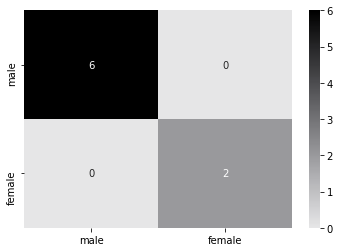

In [7]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])

# CSN gender CLAP

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_clap.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_clap.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_clap.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_clap.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_clap.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_clap.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-clap'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [4]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-31 00:11:25,322 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-31 00:11:25,323 - mmaction - INFO - Use load_from_http loader
2021-08-31 00:11:27,490 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-31 00:11:27,491 - mmaction - INFO - Use load_from_local loader
2021-08-31 00:11:27,634 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-31 00:11:27,640 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.5 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:13:39,626 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:13:39,627 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:13:39,628 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:13:39,629 - mmaction - INFO - 
mean_acc	0.8125
2021-08-31 00:13:39,942 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-31 00:13:39,943 - mmaction - INFO - Best top1_acc is 0.7857 at 5 epoch.
2021-08-31 00:13:39,944 - mmaction - INFO - Epoch(val) [5][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.8125


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 10.1 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:15:51,861 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:15:51,862 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:15:51,863 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:15:51,864 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:15:51,865 - mmaction - INFO - Epoch(val) [10][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.7 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:18:00,494 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:18:00,496 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:18:00,497 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:18:00,498 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:18:00,500 - mmaction - INFO - Epoch(val) [15][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917
2021-08-31 00:20:07,685 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.1 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:20:09,620 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:20:09,621 - mmaction - INFO - 
top1_acc	0.7143
top5_acc	1.0000
2021-08-31 00:20:09,623 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:20:09,624 - mmaction - INFO - 
mean_acc	0.7500
2021-08-31 00:20:09,625 - mmaction - INFO - Epoch(val) [20][3]	top1_acc: 0.7143, top5_acc: 1.0000, mean_class_accuracy: 0.7500


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.5 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:22:18,429 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:22:18,430 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:22:18,431 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:22:18,432 - mmaction - INFO - 
mean_acc	0.8125
2021-08-31 00:22:18,433 - mmaction - INFO - Epoch(val) [25][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.8125


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 10.0 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:24:27,050 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:24:27,051 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:24:27,052 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:24:27,052 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:24:27,053 - mmaction - INFO - Epoch(val) [30][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.1 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:26:40,111 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:26:40,112 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:26:40,113 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:26:40,113 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:26:40,114 - mmaction - INFO - Epoch(val) [35][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917
2021-08-31 00:28:54,932 - mmaction - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.1 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:28:56,907 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:28:56,908 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:28:56,909 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:28:56,910 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:28:56,910 - mmaction - INFO - Epoch(val) [40][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.6 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:31:12,015 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:31:12,017 - mmaction - INFO - 
top1_acc	0.7143
top5_acc	1.0000
2021-08-31 00:31:12,017 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:31:12,019 - mmaction - INFO - 
mean_acc	0.7292
2021-08-31 00:31:12,019 - mmaction - INFO - Epoch(val) [45][3]	top1_acc: 0.7143, top5_acc: 1.0000, mean_class_accuracy: 0.7292
2021-08-31 00:33:25,584 - mmaction - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.4 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:33:27,508 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:33:27,509 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:33:27,510 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:33:27,510 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:33:27,511 - mmaction - INFO - Epoch(val) [50][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917


In [5]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model
import pickle
import mmcv
# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

model = pickle.load(open(f"{cfg.work_dir}/model50e", 'rb'))

2021-08-10 16:54:18,016 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-10 16:54:18,017 - mmaction - INFO - Use load_from_http loader


In [6]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 0.3 task/s, elapsed: 70s, ETA:     0s
Evaluating top_k_accuracy ...

top1_acc	0.9444
top5_acc	1.0000

Evaluating mean_class_accuracy ...

mean_acc	0.9444
top1_acc: 0.9444
top5_acc: 1.0000
mean_class_accuracy: 0.9444


<AxesSubplot:>

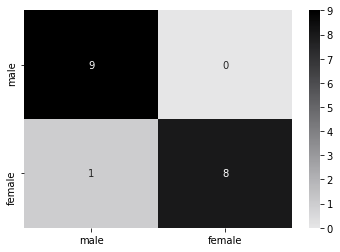

In [7]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])

# CSN gender Jog

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_jog.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_jog.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_jog.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_jog.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_jog.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_jog.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-jog'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [4]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-31 00:37:44,948 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-31 00:37:44,949 - mmaction - INFO - Use load_from_http loader
2021-08-31 00:37:47,030 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-31 00:37:47,031 - mmaction - INFO - Use load_from_local loader
2021-08-31 00:37:47,191 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-31 00:37:47,197 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 10.2 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:40:03,100 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:40:03,102 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 00:40:03,103 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:40:03,104 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 00:40:03,466 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-31 00:40:03,467 - mmaction - INFO - Best top1_acc is 0.8000 at 5 epoch.
2021-08-31 00:40:03,468 - mmaction - INFO - Epoch(val) [5][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.5 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:42:19,194 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:42:19,196 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 00:42:19,196 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:42:19,198 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 00:42:19,198 - mmaction - INFO - Epoch(val) [10][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.5 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:44:33,102 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:44:33,104 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 00:44:33,105 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:44:33,105 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 00:44:33,106 - mmaction - INFO - Epoch(val) [15][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857
2021-08-31 00:46:45,438 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 10.0 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:46:47,317 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:46:47,319 - mmaction - INFO - 
top1_acc	0.8667
top5_acc	1.0000
2021-08-31 00:46:47,319 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:46:47,320 - mmaction - INFO - 
mean_acc	0.8571
2021-08-31 00:46:47,636 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_20.pth.
2021-08-31 00:46:47,637 - mmaction - INFO - Best top1_acc is 0.8667 at 20 epoch.
2021-08-31 00:46:47,638 - mmaction - INFO - Epoch(val) [20][3]	top1_acc: 0.8667, top5_acc: 1.0000, mean_class_accuracy: 0.8571


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.7 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:49:01,364 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:49:01,365 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 00:49:01,366 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:49:01,367 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 00:49:01,367 - mmaction - INFO - Epoch(val) [25][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:51:15,294 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:51:15,295 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 00:51:15,296 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:51:15,297 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 00:51:15,297 - mmaction - INFO - Epoch(val) [30][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.7 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:53:29,673 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:53:29,675 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 00:53:29,676 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:53:29,678 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 00:53:29,679 - mmaction - INFO - Epoch(val) [35][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857
2021-08-31 00:55:42,021 - mmaction - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.8 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:55:43,923 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:55:43,924 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 00:55:43,924 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:55:43,925 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 00:55:43,925 - mmaction - INFO - Epoch(val) [40][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.9 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:57:57,461 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:57:57,462 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 00:57:57,463 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:57:57,464 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 00:57:57,464 - mmaction - INFO - Epoch(val) [45][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857
2021-08-31 01:00:09,849 - mmaction - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.7 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:00:11,825 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:00:11,826 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 01:00:11,827 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:00:11,827 - mmaction - INFO - 
mean_acc	0.7857
2021-08-31 01:00:11,828 - mmaction - INFO - Epoch(val) [50][3]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7857


In [5]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model
import pickle
import mmcv
# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

model = pickle.load(open(f"{cfg.work_dir}/model50e", 'rb'))

2021-08-10 16:54:18,016 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-10 16:54:18,017 - mmaction - INFO - Use load_from_http loader


In [6]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 0.6 task/s, elapsed: 17s, ETA:     0s
Evaluating top_k_accuracy ...

top1_acc	0.9000
top5_acc	1.0000

Evaluating mean_class_accuracy ...

mean_acc	0.9167
top1_acc: 0.9000
top5_acc: 1.0000
mean_class_accuracy: 0.9167


<AxesSubplot:>

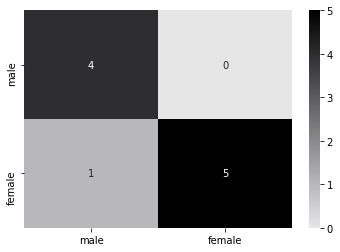

In [7]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])

# CSN gender GO

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_go.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_go.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_go.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_go.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_go.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_go.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-go'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [4]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-31 01:03:38,251 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-31 01:03:38,252 - mmaction - INFO - Use load_from_http loader
2021-08-31 01:03:40,329 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-31 01:03:40,330 - mmaction - INFO - Use load_from_local loader
2021-08-31 01:03:40,506 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-31 01:03:40,512 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.5 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:05:32,016 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:05:32,018 - mmaction - INFO - 
top1_acc	1.0000
top5_acc	1.0000
2021-08-31 01:05:32,018 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:05:32,020 - mmaction - INFO - 
mean_acc	1.0000
2021-08-31 01:05:32,338 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-31 01:05:32,339 - mmaction - INFO - Best top1_acc is 1.0000 at 5 epoch.
2021-08-31 01:05:32,339 - mmaction - INFO - Epoch(val) [5][3]	top1_acc: 1.0000, top5_acc: 1.0000, mean_class_accuracy: 1.0000


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:07:23,953 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:07:23,955 - mmaction - INFO - 
top1_acc	1.0000
top5_acc	1.0000
2021-08-31 01:07:23,955 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:07:23,956 - mmaction - INFO - 
mean_acc	1.0000
2021-08-31 01:07:23,957 - mmaction - INFO - Epoch(val) [10][3]	top1_acc: 1.0000, top5_acc: 1.0000, mean_class_accuracy: 1.0000


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:09:16,193 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:09:16,194 - mmaction - INFO - 
top1_acc	0.9444
top5_acc	1.0000
2021-08-31 01:09:16,195 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:09:16,196 - mmaction - INFO - 
mean_acc	0.9000
2021-08-31 01:09:16,196 - mmaction - INFO - Epoch(val) [15][3]	top1_acc: 0.9444, top5_acc: 1.0000, mean_class_accuracy: 0.9000
2021-08-31 01:11:06,175 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.8 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:11:08,261 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:11:08,262 - mmaction - INFO - 
top1_acc	0.8889
top5_acc	1.0000
2021-08-31 01:11:08,262 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:11:08,263 - mmaction - INFO - 
mean_acc	0.8000
2021-08-31 01:11:08,263 - mmaction - INFO - Epoch(val) [20][3]	top1_acc: 0.8889, top5_acc: 1.0000, mean_class_accuracy: 0.8000


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:12:59,866 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:12:59,867 - mmaction - INFO - 
top1_acc	0.8889
top5_acc	1.0000
2021-08-31 01:12:59,868 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:12:59,868 - mmaction - INFO - 
mean_acc	0.8000
2021-08-31 01:12:59,869 - mmaction - INFO - Epoch(val) [25][3]	top1_acc: 0.8889, top5_acc: 1.0000, mean_class_accuracy: 0.8000


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.5 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:14:51,130 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:14:51,131 - mmaction - INFO - 
top1_acc	0.9444
top5_acc	1.0000
2021-08-31 01:14:51,132 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:14:51,133 - mmaction - INFO - 
mean_acc	0.9000
2021-08-31 01:14:51,134 - mmaction - INFO - Epoch(val) [30][3]	top1_acc: 0.9444, top5_acc: 1.0000, mean_class_accuracy: 0.9000


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 11.0 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:16:42,536 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:16:42,538 - mmaction - INFO - 
top1_acc	0.9444
top5_acc	1.0000
2021-08-31 01:16:42,538 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:16:42,540 - mmaction - INFO - 
mean_acc	0.9000
2021-08-31 01:16:42,540 - mmaction - INFO - Epoch(val) [35][3]	top1_acc: 0.9444, top5_acc: 1.0000, mean_class_accuracy: 0.9000
2021-08-31 01:18:32,267 - mmaction - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:18:34,385 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:18:34,386 - mmaction - INFO - 
top1_acc	0.9444
top5_acc	1.0000
2021-08-31 01:18:34,387 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:18:34,387 - mmaction - INFO - 
mean_acc	0.9000
2021-08-31 01:18:34,388 - mmaction - INFO - Epoch(val) [40][3]	top1_acc: 0.9444, top5_acc: 1.0000, mean_class_accuracy: 0.9000


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:20:26,112 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:20:26,113 - mmaction - INFO - 
top1_acc	0.9444
top5_acc	1.0000
2021-08-31 01:20:26,114 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:20:26,114 - mmaction - INFO - 
mean_acc	0.9000
2021-08-31 01:20:26,115 - mmaction - INFO - Epoch(val) [45][3]	top1_acc: 0.9444, top5_acc: 1.0000, mean_class_accuracy: 0.9000
2021-08-31 01:22:16,411 - mmaction - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 18/18, 10.3 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:22:18,594 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:22:18,595 - mmaction - INFO - 
top1_acc	0.9444
top5_acc	1.0000
2021-08-31 01:22:18,595 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:22:18,596 - mmaction - INFO - 
mean_acc	0.9000
2021-08-31 01:22:18,597 - mmaction - INFO - Epoch(val) [50][3]	top1_acc: 0.9444, top5_acc: 1.0000, mean_class_accuracy: 0.9000


In [5]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 22/22, 0.6 task/s, elapsed: 36s, ETA:     0s
Evaluating top_k_accuracy ...

top1_acc	0.9545
top5_acc	1.0000

Evaluating mean_class_accuracy ...

mean_acc	0.9667
top1_acc: 0.9545
top5_acc: 1.0000
mean_class_accuracy: 0.9667


<AxesSubplot:>

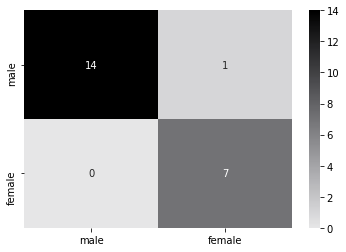

In [7]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])

# CSN gender RUN

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_run.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_run.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_run.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_run.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_run.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_run.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-run'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [4]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-31 01:25:13,172 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-31 01:25:13,173 - mmaction - INFO - Use load_from_http loader
2021-08-31 01:25:15,225 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-31 01:25:15,226 - mmaction - INFO - Use load_from_local loader
2021-08-31 01:25:15,388 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-31 01:25:15,394 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 11.1 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:27:11,770 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:27:11,771 - mmaction - INFO - 
top1_acc	0.9130
top5_acc	1.0000
2021-08-31 01:27:11,772 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:27:11,773 - mmaction - INFO - 
mean_acc	0.9115
2021-08-31 01:27:12,079 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-31 01:27:12,080 - mmaction - INFO - Best top1_acc is 0.9130 at 5 epoch.
2021-08-31 01:27:12,081 - mmaction - INFO - Epoch(val) [5][4]	top1_acc: 0.9130, top5_acc: 1.0000, mean_class_accuracy: 0.9115


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 11.0 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:29:08,848 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:29:08,849 - mmaction - INFO - 
top1_acc	0.7826
top5_acc	1.0000
2021-08-31 01:29:08,849 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:29:08,850 - mmaction - INFO - 
mean_acc	0.7962
2021-08-31 01:29:08,851 - mmaction - INFO - Epoch(val) [10][4]	top1_acc: 0.7826, top5_acc: 1.0000, mean_class_accuracy: 0.7962


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 11.0 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:31:05,590 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:31:05,591 - mmaction - INFO - 
top1_acc	0.8696
top5_acc	1.0000
2021-08-31 01:31:05,592 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:31:05,594 - mmaction - INFO - 
mean_acc	0.8615
2021-08-31 01:31:05,595 - mmaction - INFO - Epoch(val) [15][4]	top1_acc: 0.8696, top5_acc: 1.0000, mean_class_accuracy: 0.8615
2021-08-31 01:33:00,557 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 11.0 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:33:03,021 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:33:03,023 - mmaction - INFO - 
top1_acc	0.9130
top5_acc	1.0000
2021-08-31 01:33:03,024 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:33:03,026 - mmaction - INFO - 
mean_acc	0.9115
2021-08-31 01:33:03,027 - mmaction - INFO - Epoch(val) [20][4]	top1_acc: 0.9130, top5_acc: 1.0000, mean_class_accuracy: 0.9115


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 11.1 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:34:59,617 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:34:59,619 - mmaction - INFO - 
top1_acc	0.8696
top5_acc	1.0000
2021-08-31 01:34:59,620 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:34:59,622 - mmaction - INFO - 
mean_acc	0.8731
2021-08-31 01:34:59,623 - mmaction - INFO - Epoch(val) [25][4]	top1_acc: 0.8696, top5_acc: 1.0000, mean_class_accuracy: 0.8731


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 10.5 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:36:56,658 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:36:56,659 - mmaction - INFO - 
top1_acc	0.9130
top5_acc	1.0000
2021-08-31 01:36:56,660 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:36:56,660 - mmaction - INFO - 
mean_acc	0.9115
2021-08-31 01:36:56,661 - mmaction - INFO - Epoch(val) [30][4]	top1_acc: 0.9130, top5_acc: 1.0000, mean_class_accuracy: 0.9115


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 10.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:38:53,565 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:38:53,567 - mmaction - INFO - 
top1_acc	0.8696
top5_acc	1.0000
2021-08-31 01:38:53,567 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:38:53,568 - mmaction - INFO - 
mean_acc	0.8615
2021-08-31 01:38:53,569 - mmaction - INFO - Epoch(val) [35][4]	top1_acc: 0.8696, top5_acc: 1.0000, mean_class_accuracy: 0.8615
2021-08-31 01:40:47,962 - mmaction - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 11.2 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:40:50,387 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:40:50,389 - mmaction - INFO - 
top1_acc	0.8696
top5_acc	1.0000
2021-08-31 01:40:50,390 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:40:50,393 - mmaction - INFO - 
mean_acc	0.8615
2021-08-31 01:40:50,394 - mmaction - INFO - Epoch(val) [40][4]	top1_acc: 0.8696, top5_acc: 1.0000, mean_class_accuracy: 0.8615


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 10.9 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:42:46,768 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:42:46,770 - mmaction - INFO - 
top1_acc	0.9130
top5_acc	1.0000
2021-08-31 01:42:46,771 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:42:46,772 - mmaction - INFO - 
mean_acc	0.9115
2021-08-31 01:42:46,772 - mmaction - INFO - Epoch(val) [45][4]	top1_acc: 0.9130, top5_acc: 1.0000, mean_class_accuracy: 0.9115
2021-08-31 01:44:41,324 - mmaction - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 23/23, 10.5 task/s, elapsed: 2s, ETA:     0s

2021-08-31 01:44:43,885 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 01:44:43,886 - mmaction - INFO - 
top1_acc	0.9130
top5_acc	1.0000
2021-08-31 01:44:43,887 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 01:44:43,888 - mmaction - INFO - 
mean_acc	0.9115
2021-08-31 01:44:43,889 - mmaction - INFO - Epoch(val) [50][4]	top1_acc: 0.9130, top5_acc: 1.0000, mean_class_accuracy: 0.9115


In [5]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 26/26, 0.6 task/s, elapsed: 42s, ETA:     0s
Evaluating top_k_accuracy ...

top1_acc	0.8846
top5_acc	1.0000

Evaluating mean_class_accuracy ...

mean_acc	0.8810
top1_acc: 0.8846
top5_acc: 1.0000
mean_class_accuracy: 0.8810


<AxesSubplot:>

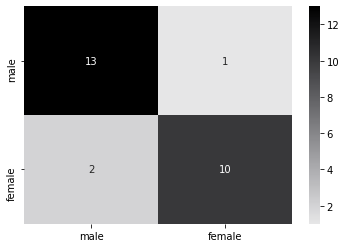

In [7]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])

# CSN gender WALK

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_walk.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_walk.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_walk.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_walk.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_walk.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_walk.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-walk'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [4]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-31 10:29:57,210 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-31 10:29:57,211 - mmaction - INFO - Use load_from_http loader
2021-08-31 10:29:59,239 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-31 10:29:59,240 - mmaction - INFO - Use load_from_local loader
2021-08-31 10:29:59,399 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-31 10:29:59,405 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.8 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:31:30,736 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:31:30,737 - mmaction - INFO - 
top1_acc	0.5500
top5_acc	1.0000
2021-08-31 10:31:30,738 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:31:30,739 - mmaction - INFO - 
mean_acc	0.5667
2021-08-31 10:31:31,054 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-31 10:31:31,055 - mmaction - INFO - Best top1_acc is 0.5500 at 5 epoch.
2021-08-31 10:31:31,056 - mmaction - INFO - Epoch(val) [5][4]	top1_acc: 0.5500, top5_acc: 1.0000, mean_class_accuracy: 0.5667


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:33:02,115 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:33:02,117 - mmaction - INFO - 
top1_acc	0.7500
top5_acc	1.0000
2021-08-31 10:33:02,118 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:33:02,119 - mmaction - INFO - 
mean_acc	0.6333
2021-08-31 10:33:02,526 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_10.pth.
2021-08-31 10:33:02,528 - mmaction - INFO - Best top1_acc is 0.7500 at 10 epoch.
2021-08-31 10:33:02,529 - mmaction - INFO - Epoch(val) [10][4]	top1_acc: 0.7500, top5_acc: 1.0000, mean_class_accuracy: 0.6333


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 11.3 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:34:33,936 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:34:33,937 - mmaction - INFO - 
top1_acc	0.7500
top5_acc	1.0000
2021-08-31 10:34:33,938 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:34:33,939 - mmaction - INFO - 
mean_acc	0.6333
2021-08-31 10:34:33,940 - mmaction - INFO - Epoch(val) [15][4]	top1_acc: 0.7500, top5_acc: 1.0000, mean_class_accuracy: 0.6333
2021-08-31 10:36:03,660 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.4 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:36:05,982 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:36:05,983 - mmaction - INFO - 
top1_acc	0.7000
top5_acc	1.0000
2021-08-31 10:36:05,983 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:36:05,984 - mmaction - INFO - 
mean_acc	0.6667
2021-08-31 10:36:05,985 - mmaction - INFO - Epoch(val) [20][4]	top1_acc: 0.7000, top5_acc: 1.0000, mean_class_accuracy: 0.6667


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.7 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:37:37,841 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:37:37,843 - mmaction - INFO - 
top1_acc	0.6500
top5_acc	1.0000
2021-08-31 10:37:37,843 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:37:37,844 - mmaction - INFO - 
mean_acc	0.6333
2021-08-31 10:37:37,845 - mmaction - INFO - Epoch(val) [25][4]	top1_acc: 0.6500, top5_acc: 1.0000, mean_class_accuracy: 0.6333


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.9 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:39:09,580 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:39:09,581 - mmaction - INFO - 
top1_acc	0.7500
top5_acc	1.0000
2021-08-31 10:39:09,582 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:39:09,582 - mmaction - INFO - 
mean_acc	0.6333
2021-08-31 10:39:09,583 - mmaction - INFO - Epoch(val) [30][4]	top1_acc: 0.7500, top5_acc: 1.0000, mean_class_accuracy: 0.6333


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.5 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:40:41,496 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:40:41,498 - mmaction - INFO - 
top1_acc	0.7500
top5_acc	1.0000
2021-08-31 10:40:41,498 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:40:41,500 - mmaction - INFO - 
mean_acc	0.7000
2021-08-31 10:40:41,500 - mmaction - INFO - Epoch(val) [35][4]	top1_acc: 0.7500, top5_acc: 1.0000, mean_class_accuracy: 0.7000
2021-08-31 10:42:11,297 - mmaction - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.4 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:42:13,628 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:42:13,630 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 10:42:13,631 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:42:13,632 - mmaction - INFO - 
mean_acc	0.7333
2021-08-31 10:42:13,962 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_40.pth.
2021-08-31 10:42:13,963 - mmaction - INFO - Best top1_acc is 0.8000 at 40 epoch.
2021-08-31 10:42:13,964 - mmaction - INFO - Epoch(val) [40][4]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7333


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.6 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:43:46,024 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:43:46,025 - mmaction - INFO - 
top1_acc	0.7500
top5_acc	1.0000
2021-08-31 10:43:46,026 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:43:46,027 - mmaction - INFO - 
mean_acc	0.6333
2021-08-31 10:43:46,028 - mmaction - INFO - Epoch(val) [45][4]	top1_acc: 0.7500, top5_acc: 1.0000, mean_class_accuracy: 0.6333
2021-08-31 10:45:15,957 - mmaction - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 10.4 task/s, elapsed: 2s, ETA:     0s

2021-08-31 10:45:18,252 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 10:45:18,254 - mmaction - INFO - 
top1_acc	0.8000
top5_acc	1.0000
2021-08-31 10:45:18,255 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 10:45:18,256 - mmaction - INFO - 
mean_acc	0.7333
2021-08-31 10:45:18,257 - mmaction - INFO - Epoch(val) [50][4]	top1_acc: 0.8000, top5_acc: 1.0000, mean_class_accuracy: 0.7333


In [5]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 0.5 task/s, elapsed: 23s, ETA:     0s
Evaluating top_k_accuracy ...

top1_acc	0.4545
top5_acc	1.0000

Evaluating mean_class_accuracy ...

mean_acc	0.4667
top1_acc: 0.4545
top5_acc: 1.0000
mean_class_accuracy: 0.4667


<AxesSubplot:>

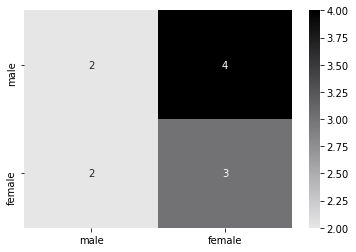

In [7]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])

# CSN gender WAVE

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_wawe.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_wawe.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_wawe.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_wawe.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_wawe.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_wawe.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-wave'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [4]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-31 11:08:49,362 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-31 11:08:49,363 - mmaction - INFO - Use load_from_http loader
2021-08-31 11:08:51,459 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-31 11:08:51,460 - mmaction - INFO - Use load_from_local loader
2021-08-31 11:08:51,617 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-31 11:08:51,619 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 10.4 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:10:55,164 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:10:55,166 - mmaction - INFO - 
top1_acc	0.8824
top5_acc	1.0000
2021-08-31 11:10:55,166 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:10:55,167 - mmaction - INFO - 
mean_acc	0.8786
2021-08-31 11:10:55,492 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-31 11:10:55,493 - mmaction - INFO - Best top1_acc is 0.8824 at 5 epoch.
2021-08-31 11:10:55,494 - mmaction - INFO - Epoch(val) [5][3]	top1_acc: 0.8824, top5_acc: 1.0000, mean_class_accuracy: 0.8786


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 9.7 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:12:59,926 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:12:59,928 - mmaction - INFO - 
top1_acc	0.8235
top5_acc	1.0000
2021-08-31 11:12:59,929 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:12:59,930 - mmaction - INFO - 
mean_acc	0.8071
2021-08-31 11:12:59,931 - mmaction - INFO - Epoch(val) [10][3]	top1_acc: 0.8235, top5_acc: 1.0000, mean_class_accuracy: 0.8071


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 9.7 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:15:04,540 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:15:04,542 - mmaction - INFO - 
top1_acc	0.7647
top5_acc	1.0000
2021-08-31 11:15:04,543 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:15:04,544 - mmaction - INFO - 
mean_acc	0.8000
2021-08-31 11:15:04,544 - mmaction - INFO - Epoch(val) [15][3]	top1_acc: 0.7647, top5_acc: 1.0000, mean_class_accuracy: 0.8000
2021-08-31 11:17:08,138 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 10.0 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:17:10,244 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:17:10,246 - mmaction - INFO - 
top1_acc	0.8824
top5_acc	1.0000
2021-08-31 11:17:10,246 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:17:10,247 - mmaction - INFO - 
mean_acc	0.8786
2021-08-31 11:17:10,248 - mmaction - INFO - Epoch(val) [20][3]	top1_acc: 0.8824, top5_acc: 1.0000, mean_class_accuracy: 0.8786


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 9.8 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:19:15,240 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:19:15,242 - mmaction - INFO - 
top1_acc	0.8824
top5_acc	1.0000
2021-08-31 11:19:15,243 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:19:15,244 - mmaction - INFO - 
mean_acc	0.8786
2021-08-31 11:19:15,245 - mmaction - INFO - Epoch(val) [25][3]	top1_acc: 0.8824, top5_acc: 1.0000, mean_class_accuracy: 0.8786


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 10.1 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:21:20,778 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:21:20,779 - mmaction - INFO - 
top1_acc	0.8235
top5_acc	1.0000
2021-08-31 11:21:20,780 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:21:20,781 - mmaction - INFO - 
mean_acc	0.8071
2021-08-31 11:21:20,782 - mmaction - INFO - Epoch(val) [30][3]	top1_acc: 0.8235, top5_acc: 1.0000, mean_class_accuracy: 0.8071


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 9.7 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:23:26,072 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:23:26,074 - mmaction - INFO - 
top1_acc	0.9412
top5_acc	1.0000
2021-08-31 11:23:26,075 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:23:26,076 - mmaction - INFO - 
mean_acc	0.9500
2021-08-31 11:23:26,429 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_35.pth.
2021-08-31 11:23:26,430 - mmaction - INFO - Best top1_acc is 0.9412 at 35 epoch.
2021-08-31 11:23:26,431 - mmaction - INFO - Epoch(val) [35][3]	top1_acc: 0.9412, top5_acc: 1.0000, mean_class_accuracy: 0.9500
2021-08-31 11:25:29,926 - mmaction - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 9.8 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:25:32,124 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:25:32,126 - mmaction - INFO - 
top1_acc	0.9412
top5_acc	1.0000
2021-08-31 11:25:32,126 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:25:32,128 - mmaction - INFO - 
mean_acc	0.9500
2021-08-31 11:25:32,128 - mmaction - INFO - Epoch(val) [40][3]	top1_acc: 0.9412, top5_acc: 1.0000, mean_class_accuracy: 0.9500


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 10.1 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:27:37,005 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:27:37,007 - mmaction - INFO - 
top1_acc	0.8824
top5_acc	1.0000
2021-08-31 11:27:37,007 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:27:37,008 - mmaction - INFO - 
mean_acc	0.8786
2021-08-31 11:27:37,009 - mmaction - INFO - Epoch(val) [45][3]	top1_acc: 0.8824, top5_acc: 1.0000, mean_class_accuracy: 0.8786
2021-08-31 11:29:40,119 - mmaction - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 17/17, 9.9 task/s, elapsed: 2s, ETA:     0s

2021-08-31 11:29:42,191 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 11:29:42,193 - mmaction - INFO - 
top1_acc	0.8824
top5_acc	1.0000
2021-08-31 11:29:42,193 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 11:29:42,195 - mmaction - INFO - 
mean_acc	0.8786
2021-08-31 11:29:42,195 - mmaction - INFO - Epoch(val) [50][3]	top1_acc: 0.8824, top5_acc: 1.0000, mean_class_accuracy: 0.8786


In [5]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 24/24, 0.2 task/s, elapsed: 112s, ETA:     0s
Evaluating top_k_accuracy ...

top1_acc	0.9583
top5_acc	1.0000

Evaluating mean_class_accuracy ...

mean_acc	0.9500
top1_acc: 0.9583
top5_acc: 1.0000
mean_class_accuracy: 0.9500


<AxesSubplot:>

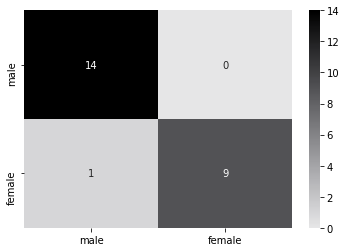

In [7]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])